In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans


# Modelado con K-Means

In [2]:
# Levanta datos prepocesados
data_cat = pd.read_csv("data_cat.csv")
data_nom = pd.read_csv("data_nom.csv")
data_lan = pd.read_csv("data_nom.csv")

In [3]:
onehot = OneHotEncoder(sparse=False)

In [4]:
onehotfit = onehot.fit(data_cat)

In [5]:
data_cat.columns

Index(['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'job', 'location', 'offspring', 'pets', 'smokes', 'white',
       'other', 'hispanic / latin', 'rather not say', 'middle eastern',
       'native american', 'asian', 'pacific islander', 'indian', 'black',
       'sign', 'sign_matters', 'dogs', 'cats'],
      dtype='object')

In [6]:
onehotfit.categories_

[array(['available', 'married', 'seeing someone', 'single', 'unknown'],
       dtype=object),
 array(['f', 'm'], dtype=object),
 array(['bisexual', 'gay', 'straight'], dtype=object),
 array(['a little extra', 'athletic', 'average', 'curvy', 'fit',
        'full figured', 'jacked', 'overweight', 'rather not say', 'skinny',
        'thin', 'used up'], dtype=object),
 array(['anything', 'halal', 'kosher', 'mostly anything', 'mostly halal',
        'mostly kosher', 'mostly other', 'mostly vegan',
        'mostly vegetarian', 'other', 'rather not say',
        'strictly anything', 'strictly halal', 'strictly kosher',
        'strictly other', 'strictly vegan', 'strictly vegetarian', 'vegan',
        'vegetarian'], dtype=object),
 array(['desperately', 'not at all', 'often', 'rarely', 'rather not say',
        'socially', 'very often'], dtype=object),
 array(['never', 'often', 'rather not say', 'sometimes'], dtype=object),
 array(['college/university', 'dropped out of college/university',
  

In [7]:
data_cat_dummies = onehot.transform(data_cat)

In [8]:
data_cat_dummies

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
data_cat_dummies = pd.DataFrame(data_cat_dummies, columns=onehot.get_feature_names(data_cat.columns))

In [10]:
onehot.get_feature_names(data_cat.columns)

array(['status_available', 'status_married', 'status_seeing someone',
       'status_single', 'status_unknown', 'sex_f', 'sex_m',
       'orientation_bisexual', 'orientation_gay', 'orientation_straight',
       'body_type_a little extra', 'body_type_athletic',
       'body_type_average', 'body_type_curvy', 'body_type_fit',
       'body_type_full figured', 'body_type_jacked',
       'body_type_overweight', 'body_type_rather not say',
       'body_type_skinny', 'body_type_thin', 'body_type_used up',
       'diet_anything', 'diet_halal', 'diet_kosher',
       'diet_mostly anything', 'diet_mostly halal', 'diet_mostly kosher',
       'diet_mostly other', 'diet_mostly vegan', 'diet_mostly vegetarian',
       'diet_other', 'diet_rather not say', 'diet_strictly anything',
       'diet_strictly halal', 'diet_strictly kosher',
       'diet_strictly other', 'diet_strictly vegan',
       'diet_strictly vegetarian', 'diet_vegan', 'diet_vegetarian',
       'drinks_desperately', 'drinks_not at all', 

### Ahora vamos a standarizar las variables nominales

In [11]:
scaler = StandardScaler()
data_nom_scaled = scaler.fit_transform(data_nom)
data_nom_scaled = pd.DataFrame(data_nom_scaled, columns=data_nom.columns)
data_nom_scaled

,age,height,income,latitude,longitude
0,-1.093898,1.666782,-0.205806,-0.362416,-0.064296
1,0.281370,0.424433,0.616021,0.094853,0.001786
2,0.598740,-0.072507,-0.205806,0.017802,-0.065676
3,-0.988108,0.672903,-0.000341,0.309659,0.016193
4,-0.353369,-0.569446,-0.205806,0.017802,-0.065676
...,...,...,...,...,...
59941,2.820327,-1.563325,-0.205806,0.094853,0.001786
59942,-0.882318,0.921372,-0.205806,0.017802,-0.065676
59943,1.021900,0.672903,0.821475,-0.362416,-0.064296
59944,-0.564949,1.169842,-0.205806,0.017802,-0.065676


In [12]:
# aca agrego los lenguajes que ya estan en forma vectorial
data_nom_cat = pd.merge(data_nom_scaled, data_cat_dummies,how="inner", left_index=True, right_index=True)
data_nom_cat = pd.merge(data_nom_cat,data_lan,how="inner", left_index=True, right_index=True)
data_nom_cat

,age_x,height_x,income_x,latitude_x,longitude_x,status_available,status_married,status_seeing someone,status_single,status_unknown,...,dogs_no_opinion dogs,cats_ dislikes cats,cats_ has cats,cats_ likes cats,cats_ no_opinion cats,age_y,height_y,income_y,latitude_y,longitude_y
0,-1.093898,1.666782,-0.205806,-0.362416,-0.064296,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,22,75.0,-1,37.653540,-122.416866
1,0.281370,0.424433,0.616021,0.094853,0.001786,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,35,70.0,80000,37.804456,-122.271356
2,0.598740,-0.072507,-0.205806,0.017802,-0.065676,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,38,68.0,-1,37.779026,-122.419906
3,-0.988108,0.672903,-0.000341,0.309659,0.016193,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,23,71.0,20000,37.875350,-122.239634
4,-0.353369,-0.569446,-0.205806,0.017802,-0.065676,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,29,66.0,-1,37.779026,-122.419906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,2.820327,-1.563325,-0.205806,0.094853,0.001786,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,59,62.0,-1,37.804456,-122.271356
59942,-0.882318,0.921372,-0.205806,0.017802,-0.065676,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,24,72.0,-1,37.779026,-122.419906
59943,1.021900,0.672903,0.821475,-0.362416,-0.064296,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,42,71.0,100000,37.653540,-122.416866
59944,-0.564949,1.169842,-0.205806,0.017802,-0.065676,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,27,73.0,-1,37.779026,-122.419906


In [13]:
kmeans_model = KMeans()
model_fit = kmeans_model.fit(data_nom_cat)

In [15]:
model_fit.n_clusters

8

In [16]:
#dbsscan_model = DBSCAN()
#model2_fit = dbsscan_model.fit(data_nom_cat)

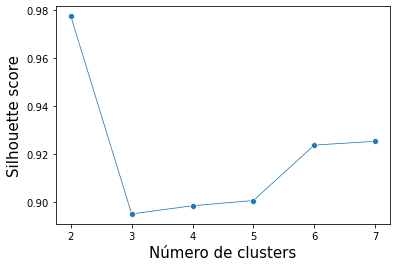

In [17]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,8);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(data_nom_cat)
    score=silhouette_score(data_nom_cat,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

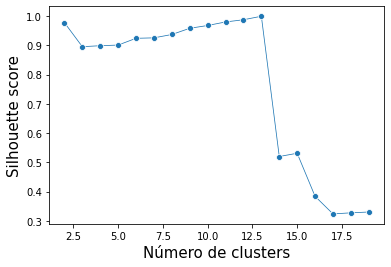

In [18]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,20);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(data_nom_cat)
    score=silhouette_score(data_nom_cat,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

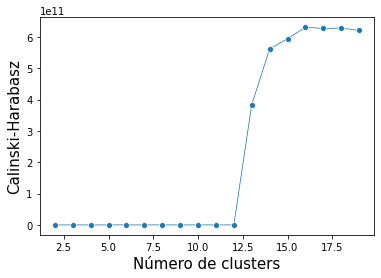

In [19]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,20);
ch_scores=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(data_nom_cat)
    score=calinski_harabasz_score(data_nom_cat,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

For n_clusters = 2 The average silhouette_score is : 0.9775353694540129
For n_clusters = 3 The average silhouette_score is : 0.8951911174506489
For n_clusters = 4 The average silhouette_score is : 0.8985993102659541


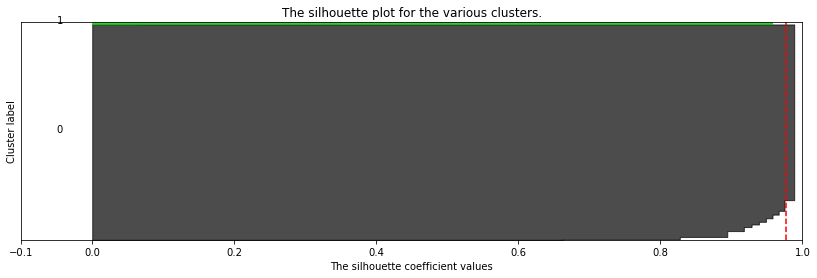

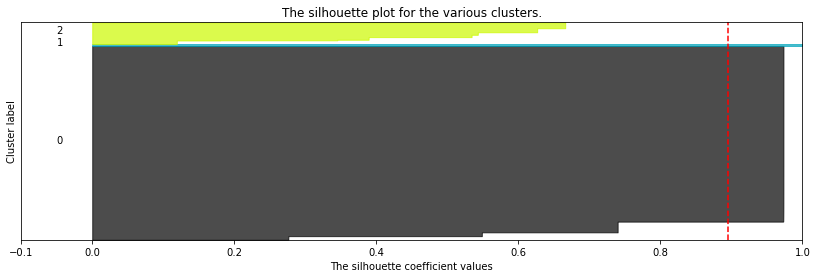

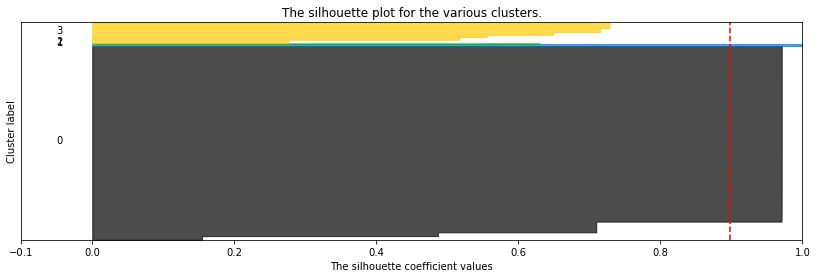

In [20]:
import matplotlib.cm as cm

for n_clusters in range(2,5):
    # Create a subplot with 1 row 
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(14, 4)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_nom_cat) + (n_clusters + 1) * 5])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_nom_cat)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_nom_cat, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_nom_cat, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

plt.show()

# DB-SCAN

In [21]:
dbsscan_model = DBSCAN()
model2_fit = dbsscan_model.fit(data_nom_cat)

In [22]:
model2_fit.core_sample_indices_

array([], dtype=int64)

In [23]:
from scipy.spatial.distance import pdist,squareform

In [24]:
X=data_nom_cat
minPts=5;
k=minPts-1;

D=squareform(pdist(X));

k_distances=np.zeros(D.shape[0]);



: 

: 

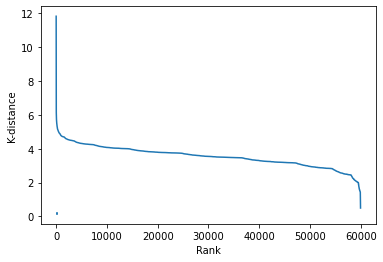

In [ ]:
for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([0.2,0.15],0,400,linestyles='dashed');